In [1]:
from dotenv import load_dotenv
import os
load_dotenv()
import pandas as pd
import psycopg2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
conn = psycopg2.connect(
    dbname=os.getenv("PG_DBNAME"),
    user=os.getenv("PG_USER"),
    password=os.getenv("PG_PASSWORD"),
    host=os.getenv("PG_HOST"),
    port=os.getenv("PG_PORT"))

In [3]:
query_pred = "SELECT country, year, happiness_score_real, happiness_score_predicted FROM predictions;"
df_pred = pd.read_sql(query_pred, conn)

/tmp/ipykernel_21852/3554712493.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pred = pd.read_sql(query_pred, conn)


In [4]:
y_true = df_pred['happiness_score_real']
y_pred = df_pred['happiness_score_predicted']
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2  = r2_score(y_true, y_pred)
print("MAE es", round(mae, 4))
print("MSE es", round(mse, 4))
print("R² es", round(r2, 4))

MAE es 0.4273
MSE es 0.3022
R² es 0.7707


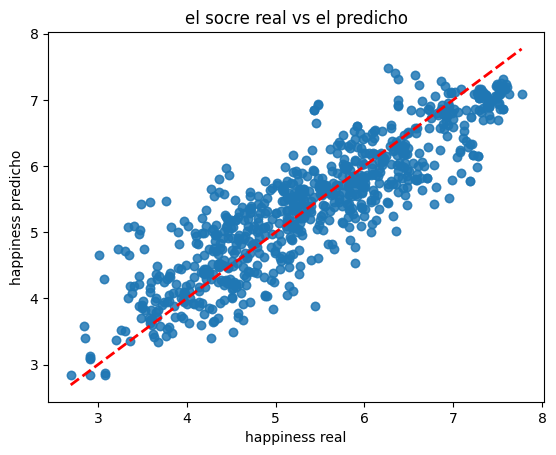

In [5]:
plt.scatter(y_true, y_pred, alpha=0.6)
plt.plot(
    [y_true.min(), y_true.max()],
    [y_true.min(), y_true.max()],
    '--r', linewidth=2)
plt.xlabel('happiness real')
plt.ylabel('happiness predicho')
plt.title('el socre real vs el predicho')
plt.show()